In [1]:
import sys
sys.path.append("..")
import aux.models as aux
import ciw
import matplotlib.pyplot as plt

In [2]:
class JSQRouting(ciw.Node):
    def next_node(self, ind):
        """
        Finds the next node according the routing method:
          - We overwrite this, so it now looks at the two PSNode servers, and decides which is 'least busy'
          - This can do anything we like, so you can define 'less busy' however you like
          - For now I will just look at number of customers
        """
        busyness = {n: self.simulation.nodes[n].number_of_individuals for n in range(2, self.simulation.network.number_of_nodes + 1)}
        chosen_n = sorted(busyness.keys(), key=lambda x: busyness[x])[0]
        return self.simulation.nodes[chosen_n]

In [3]:
def compare_theory_and_simulation(l, mu, k, limit, max_time, obs_period):
    # Define Markov chain & solve
    M = aux.MMkPS_mc(l, mu, k, limit)
    M.solve()
    M.aggregate_states()
    
    # Define simulation & solve
    N = ciw.create_network(
        arrival_distributions=[ciw.dists.Exponential(l)] + [ciw.dists.NoArrivals() for _ in range(k)],
        service_distributions=[ciw.dists.Deterministic(0)] + [ciw.dists.Exponential(mu) for _ in range(k)],
        number_of_servers=[float('inf') for _ in range(k+1)],
        routing=[[0 for _ in range(k+1)] for _ in range(k+1)]
    )
    ciw.seed(0)
    Q = ciw.Simulation(N, node_class=[JSQRouting]+[ciw.PSNode for _ in range(k)],
                       tracker=ciw.trackers.SystemPopulation())
    Q.simulate_until_max_time(max_time)
    experimental = Q.statetracker.state_probabilities(observation_period=obs_period)
    
    # Plot and compare
    fig, ax = plt.subplots(1)
    ax.plot(sorted(M.aggregate_probs.keys()), [M.aggregate_probs[k] for k in sorted(M.aggregate_probs.keys())], label='Theoretical')
    ax.scatter(sorted(M.aggregate_probs.keys()), [M.aggregate_probs[k] for k in sorted(M.aggregate_probs.keys())])
    ax.plot(sorted(experimental.keys()), [experimental[k] for k in sorted(experimental.keys())], label='Simulation')
    ax.scatter(sorted(experimental.keys()), [experimental[k] for k in sorted(experimental.keys())])
    ax.set_xlim(0, max(experimental.keys()))
    ax.legend(fontsize=14)
    ax.set_xlabel('Number of Customers', fontsize=14)
    ax.set_ylabel('Probability', fontsize=14)
    ax.set_title(f"$\lambda = {l}, \mu= {mu}$", fontsize=16)
    return fig

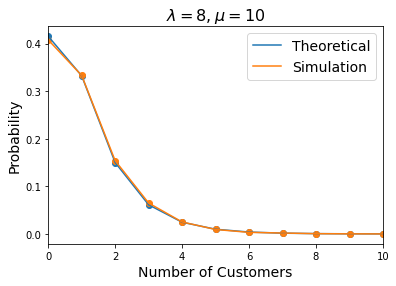

In [4]:
compare_theory_and_simulation(l=8, mu=10, k=2, limit=30, max_time=2000, obs_period=(200, 1800));

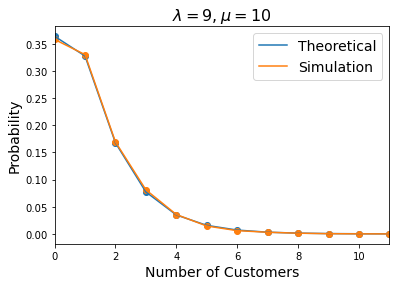

In [5]:
compare_theory_and_simulation(l=9, mu=10, k=2, limit=30, max_time=2000, obs_period=(200, 1800));

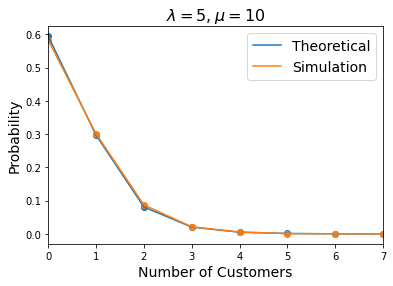

In [6]:
compare_theory_and_simulation(l=5, mu=10, k=2, limit=30, max_time=2000, obs_period=(200, 1800));

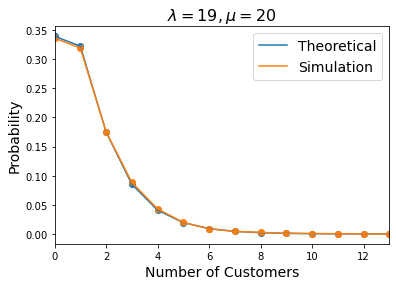

In [7]:
compare_theory_and_simulation(l=19, mu=20, k=2, limit=30, max_time=2000, obs_period=(200, 1800));

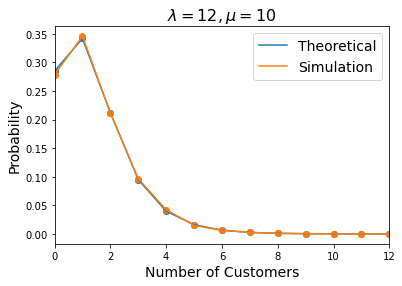

In [8]:
compare_theory_and_simulation(l=12, mu=10, k=3, limit=12, max_time=2000, obs_period=(200, 1800));

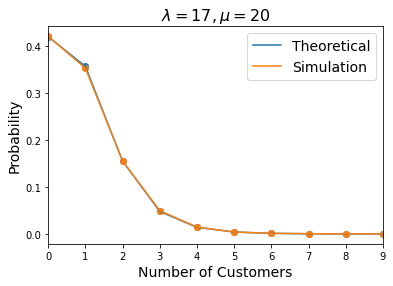

In [9]:
compare_theory_and_simulation(l=17, mu=20, k=3, limit=15, max_time=2000, obs_period=(200, 1800));

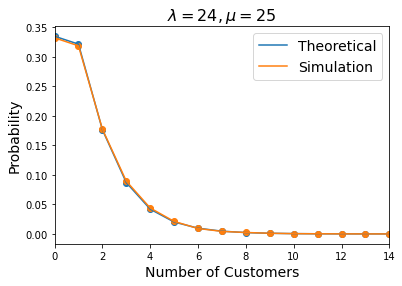

In [10]:
compare_theory_and_simulation(l=24, mu=25, k=2, limit=30, max_time=2000, obs_period=(200, 1800));

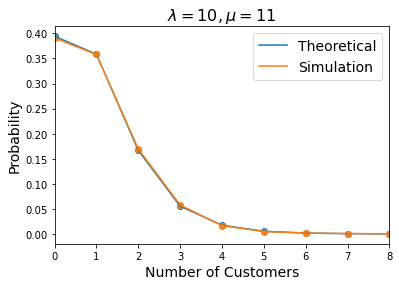

In [11]:
compare_theory_and_simulation(l=10, mu=11, k=3, limit=12, max_time=2000, obs_period=(200, 1800));

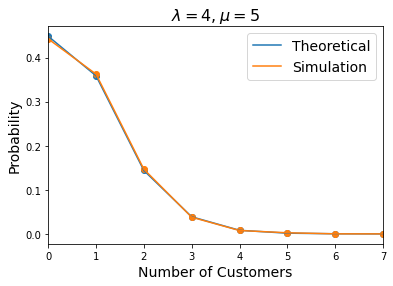

In [12]:
compare_theory_and_simulation(l=4, mu=5, k=4, limit=8, max_time=2000, obs_period=(200, 1800));

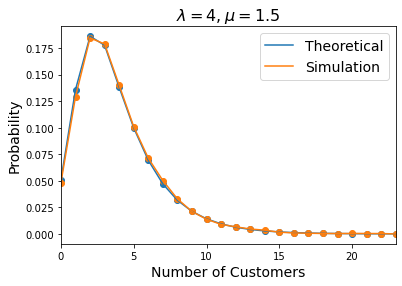

In [13]:
compare_theory_and_simulation(l=4, mu=1.5, k=4, limit=8, max_time=5000, obs_period=(500, 4500));

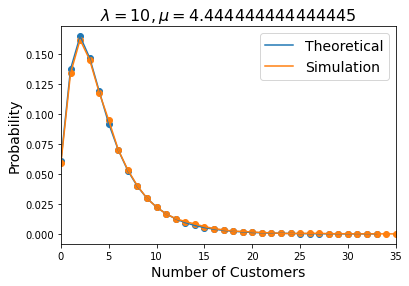

In [14]:
compare_theory_and_simulation(l=10, mu=10/(3*0.75), k=3, limit=12, max_time=5000, obs_period=(500, 4500));